<a href="https://colab.research.google.com/github/spshreya/Data_science_projects/blob/main/Regression_Insureance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/playground-series-s4e12

In [ ]:
import zipfile
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# # Replace 'your_file.zip' with the name of your uploaded ZIP file
# zip_file = "playground-series-s4e12.zip"

# # Create a directory to extract files
# extract_to = "./extracted"
# os.makedirs(extract_to, exist_ok=True)

# # Extract the ZIP file
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Files extracted to:", extract_to)

In [ ]:
# # Adjust the path as needed
# csv_file_path = os.path.join(extract_to, "train.csv")
train_df = pd.read_csv('train.csv')

In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
# csv_file_path = os.path.join(extract_to, "sample_submission.csv")
# sub_df = pd.read_csv(csv_file_path)

In [ ]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
#sub_df.head()

In [ ]:
train_df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [ ]:
train_df.shape

(1200000, 21)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [ ]:
train_df.isnull().sum()/train_df.shape[0]*100

,0
id,0.000000
Age,1.558750
Gender,0.000000
Annual Income,3.745750
Marital Status,1.544083
Number of Dependents,9.139333
Education Level,0.000000
Occupation,29.839583
Health Score,6.173000
Location,0.000000


In [ ]:
train_df[train_df['id'].duplicated()]

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


In [ ]:
train_df.set_index('id', inplace=True)

In [ ]:
#!pip install missingno

In [ ]:
import missingno as msno

<Axes: >

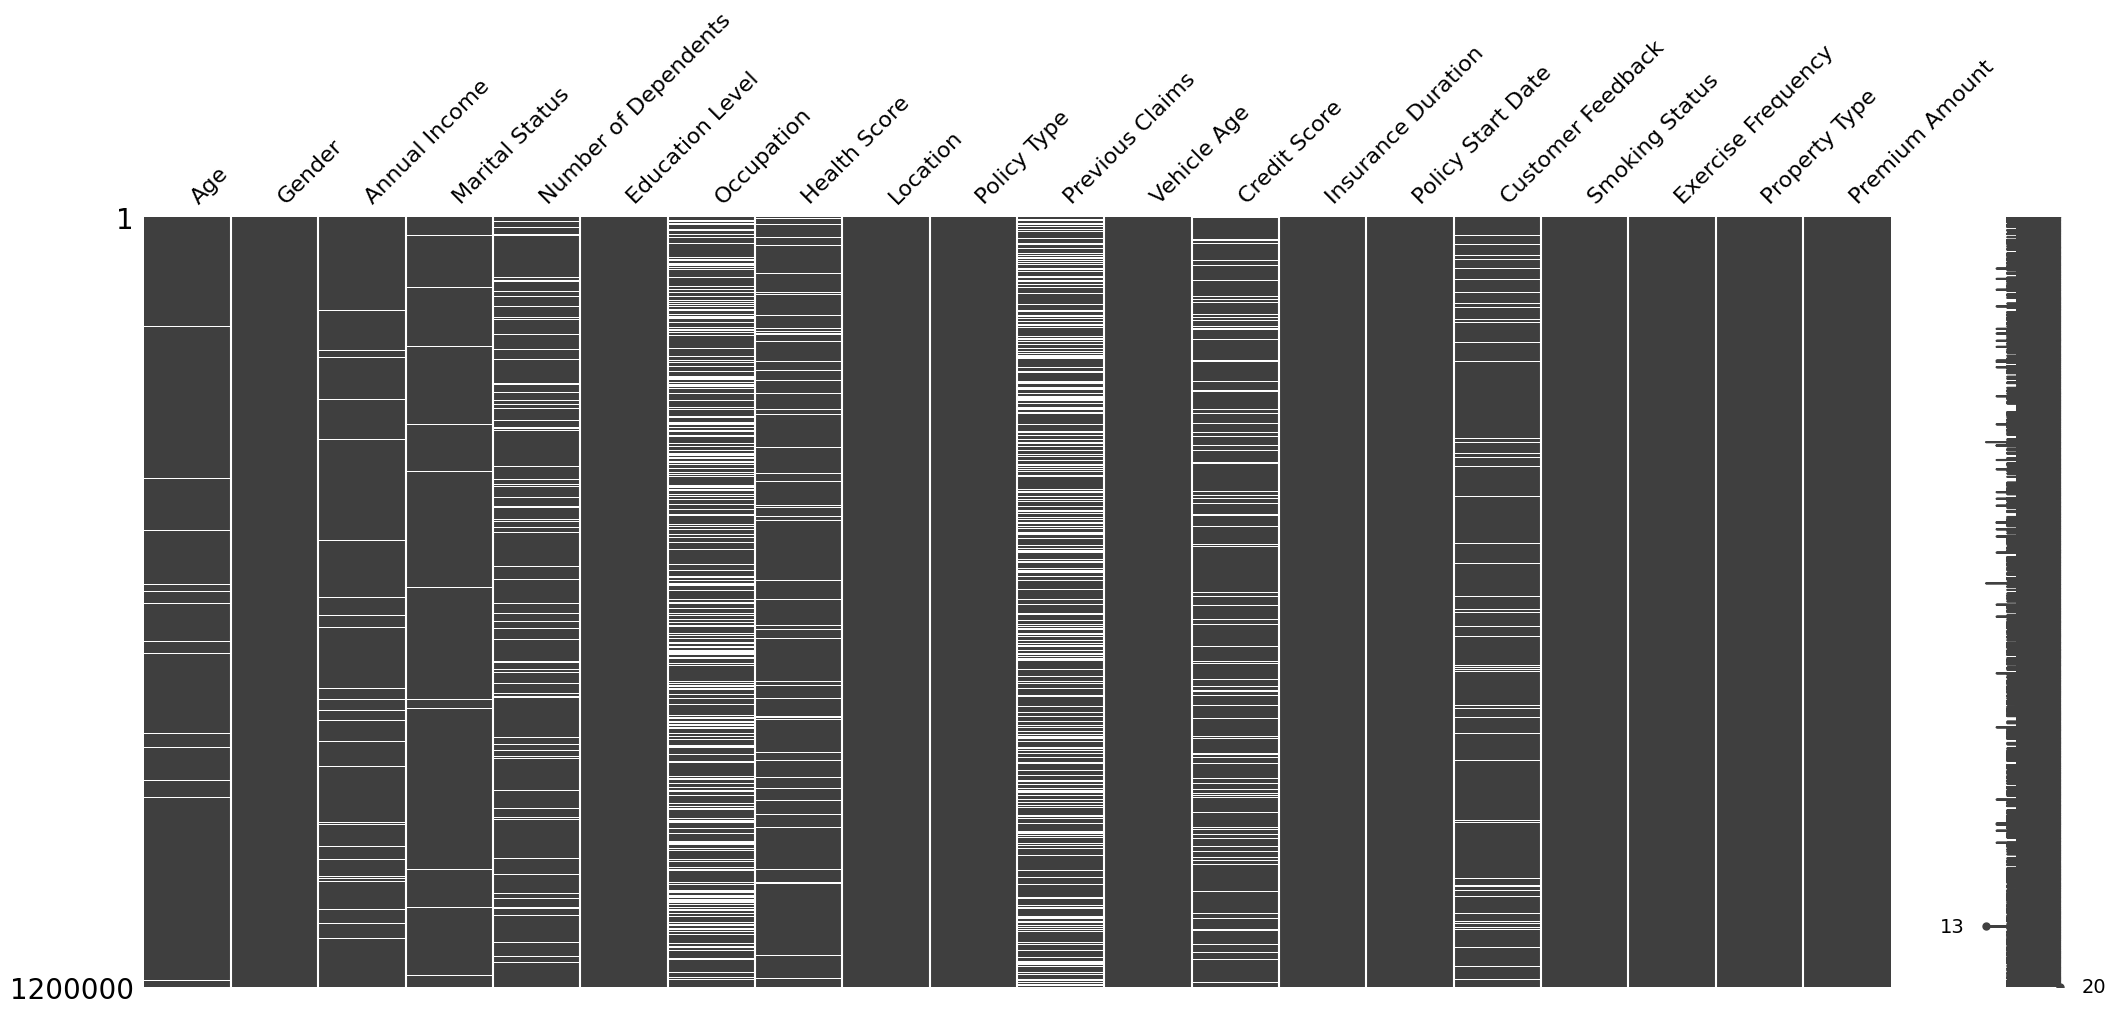

In [ ]:
msno.matrix(train_df)

In [ ]:
train_df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [ ]:
train_df[train_df['Annual Income']==1]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
1013454,20.0,Female,1.0,Single,0.0,Bachelor's,NaN,34.244299,Urban,Comprehensive,1.0,9.0,752.0,7.0,2023-05-31 15:21:39.263607,Good,No,Daily,Apartment,2063.0


In [ ]:
train_df.loc[train_df['Annual Income'] == 1, 'Annual Income'] = np.nan

In [ ]:
train_df[train_df['Annual Income']==1]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,


In [ ]:
train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])

In [ ]:
print(train_df['Policy Start Date'].min(), train_df['Policy Start Date'].max())

2019-08-17 15:21:39.080371 2024-08-15 15:21:39.287115


In [ ]:
train_df.describe(include=['object'])

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,1200000,1181471,1200000,841925,1200000,1200000,1122176,1200000,1200000,1200000
unique,2,3,4,3,3,3,3,2,4,3
top,Male,Single,Master's,Employed,Suburban,Premium,Average,Yes,Weekly,House
freq,602571,395391,303818,282750,401542,401846,377905,601873,306179,400349


In [ ]:
df = train_df.copy()

In [ ]:
# Check the unique values in each column
for col in ['Gender', 'Marital Status', 'Education Level', 'Occupation',
            'Location', 'Policy Type', 'Customer Feedback',
            'Smoking Status', 'Exercise Frequency', 'Property Type']:
    print(f"Unique values in {col}:")
    print(train_df[col].unique())
    print("\n")

Unique values in Gender:
['Female' 'Male']


Unique values in Marital Status:
['Married' 'Divorced' 'Single' nan]


Unique values in Education Level:
["Bachelor's" "Master's" 'High School' 'PhD']


Unique values in Occupation:
['Self-Employed' nan 'Employed' 'Unemployed']


Unique values in Location:
['Urban' 'Rural' 'Suburban']


Unique values in Policy Type:
['Premium' 'Comprehensive' 'Basic']


Unique values in Customer Feedback:
['Poor' 'Average' 'Good' nan]


Unique values in Smoking Status:
['No' 'Yes']


Unique values in Exercise Frequency:
['Weekly' 'Monthly' 'Daily' 'Rarely']


Unique values in Property Type:
['House' 'Apartment' 'Condo']




In [ ]:
for col in ['Gender','Smoking Status','Marital Status', 'Education Level', 'Occupation',
            'Location', 'Policy Type', 'Customer Feedback',
            'Exercise Frequency', 'Property Type']:
    df[col] = df[col].astype('category').cat.codes


In [ ]:
# Check the unique values in each column
for col in ['Gender', 'Marital Status', 'Education Level', 'Occupation',
            'Location', 'Policy Type', 'Customer Feedback',
            'Smoking Status', 'Exercise Frequency', 'Property Type']:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")

Unique values in Gender:
[0 1]


Unique values in Marital Status:
[ 1  0  2 -1]


Unique values in Education Level:
[0 2 1 3]


Unique values in Occupation:
[ 1 -1  0  2]


Unique values in Location:
[2 0 1]


Unique values in Policy Type:
[2 1 0]


Unique values in Customer Feedback:
[ 2  0  1 -1]


Unique values in Smoking Status:
[0 1]


Unique values in Exercise Frequency:
[3 1 0 2]


Unique values in Property Type:
[2 0 1]




In [ ]:
df[df['Premium Amount'].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,


In [ ]:
df.dropna(subset=['Premium Amount'], inplace=True)

In [ ]:
df.drop('Policy Start Date', axis=1, inplace=True)

In [ ]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,2,0,3,2,2869.0
1,39.0,0,31678.0,0,3.0,2,-1,15.569731,0,1,1.0,12.0,694.0,2.0,0,1,1,2,1483.0
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,1.0,14.0,NaN,3.0,1,1,3,2,567.0
3,21.0,1,141855.0,1,2.0,0,-1,10.938144,0,0,1.0,0.0,367.0,1.0,2,1,0,0,765.0
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,2,1,3,2,2022.0


## Feature Importance with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the features (X) and target (y)
df_sample = df.sample(frac=0.1, random_state=42)
X = df_sample.drop('Premium Amount', axis=1)
y = df_sample['Premium Amount']

# Initialize and fit a RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [ ]:
# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)


Health Score            0.150466
Annual Income           0.149648
Credit Score            0.132396
Age                     0.100269
Vehicle Age             0.075487
Insurance Duration      0.053761
Number of Dependents    0.049725
Customer Feedback       0.040134
Education Level         0.031368
Exercise Frequency      0.031284
Occupation              0.031281
Marital Status          0.029755
Previous Claims         0.027711
Location                0.023672
Property Type           0.023393
Policy Type             0.023362
Smoking Status          0.013224
Gender                  0.013062
dtype: float64


## Feature importance with mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_regression

df_sample = df.sample(frac=0.1, random_state=42)
X = df_sample.drop('Premium Amount', axis=1)
y = df_sample['Premium Amount']
# Compute mutual information
mi_scores = mutual_info_regression(X.fillna(-1), y)  # Replace NaNs with a placeholder
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)
print(mi_scores)

Annual Income           0.097224
Health Score            0.090388
Credit Score            0.022553
Age                     0.005845
Previous Claims         0.005463
Exercise Frequency      0.004495
Number of Dependents    0.003637
Customer Feedback       0.002459
Policy Type             0.001910
Occupation              0.001903
Marital Status          0.000730
Insurance Duration      0.000275
Smoking Status          0.000165
Location                0.000028
Gender                  0.000000
Vehicle Age             0.000000
Education Level         0.000000
Property Type           0.000000
dtype: float64


The Random Forest Regressor and Mutual Information Regressor have produced different feature importance results, which is expected because:

Random Forest Regressor evaluates features based on their contribution to reducing variance (split quality) across all trees.
Mutual Information measures the dependency between each feature and the target, capturing non-linear relationships but considering them independently of the model.
Analysis of the Results
1. Top Features (Random Forest)
The most important features are:

Health Score
Annual Income
Credit Score
Age
Vehicle Age
2. Top Features (Mutual Information)
The most dependent features are:

Annual Income
Health Score
Credit Score
Observations
Agreement on Key Features:
Both methods agree that Annual Income, Health Score, and Credit Score are important. This adds confidence in these features being relevant to the target variable (Premium Amount).

Differences in Rankings:

Random Forest highlights Age, Vehicle Age, and Insurance Duration as important, but these have very low scores in Mutual Information.
Mutual Information downplays these because it evaluates each feature independently and does not capture feature interactions that Random Forest leverages.
Low or Zero Importance:

Mutual Information gives zero importance to Gender, Education Level, and Property Type, which could be due to these features having little or no direct association with the target.
Random Forest assigns minimal importance to these features, possibly capturing some minor interactions.

In [ ]:
import shap

explainer = shap.Explainer(model)

In [ ]:
X_sample = X.sample(n=100, random_state=42)

shap_values = explainer.shap_values(X_sample)

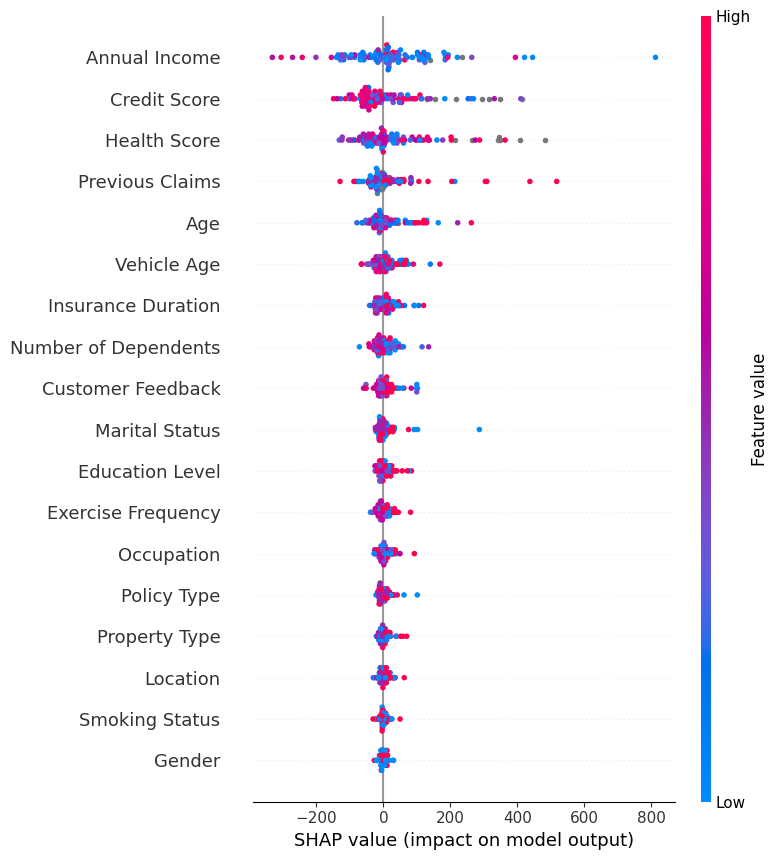

In [ ]:
shap.summary_plot(shap_values, X_sample)

In [ ]:
X.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [ ]:
features = ['Annual Income', 'Health Score', 'Credit Score', 'Age', 'Vehicle Age','Previous Claims', 'Premium Amount']

In [ ]:
df_features = train_df[features]

In [ ]:
df_features.head()

,Annual Income,Health Score,Credit Score,Age,Vehicle Age,Previous Claims,Premium Amount
id,,,,,,,
0,10049.0,22.598761,372.0,19.0,17.0,2.0,2869.0
1,31678.0,15.569731,694.0,39.0,12.0,1.0,1483.0
2,25602.0,47.177549,NaN,23.0,14.0,1.0,567.0
3,141855.0,10.938144,367.0,21.0,0.0,1.0,765.0
4,39651.0,20.376094,598.0,21.0,8.0,0.0,2022.0


In [ ]:
df_features.isnull().sum()

,0
Annual Income,44950
Health Score,74076
Credit Score,137882
Age,18705
Vehicle Age,6
Previous Claims,364029
Premium Amount,0


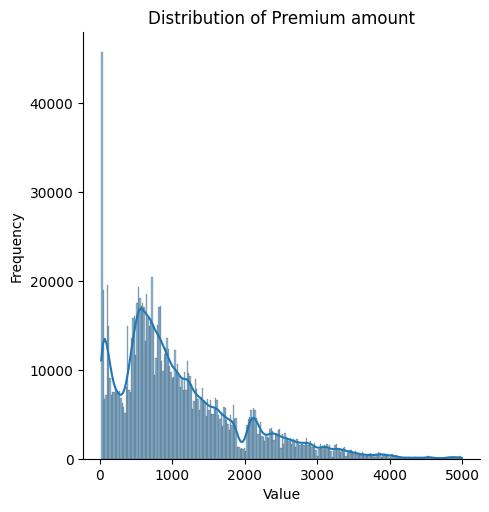

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to plot
sns.displot(df_features['Premium Amount'], kde=True)  # kde=True adds a Kernel Density Estimate (smooth curve)

# Customize plot (optional)
plt.title('Distribution of Premium amount')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

https://datascience.stackexchange.com/questions/122585/ml-regression-for-skewed-data


In [ ]:
import numpy as np

# Assuming 'df' is your DataFrame and 'column_name' is the column to transform

# Add a small constant to avoid log(0) if there are zeros
df_features['log_premium_amount'] = np.log1p(df_features['Premium Amount'])  # log

<ipython-input-14-7d9fbccddd6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['log_premium_amount'] = np.log1p(df_features['Premium Amount'])  # log


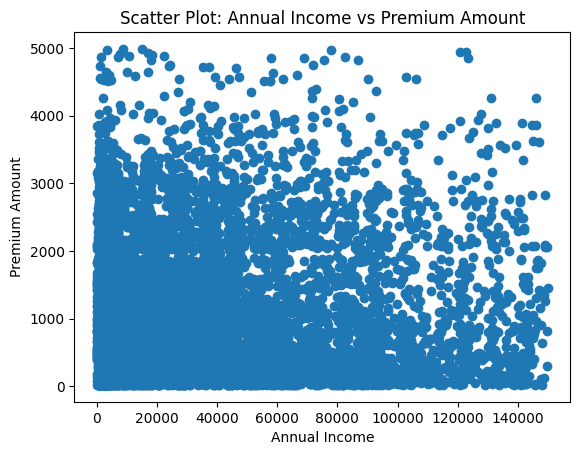

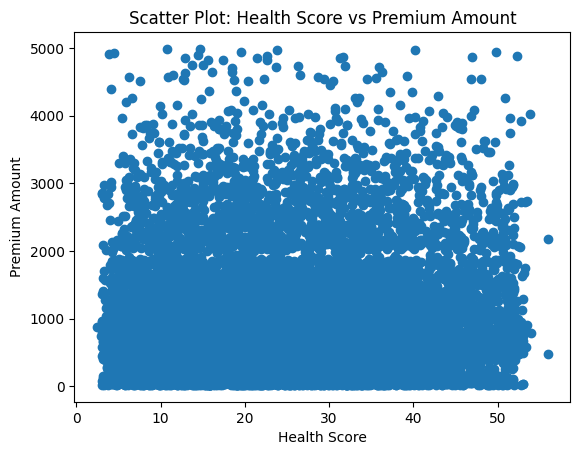

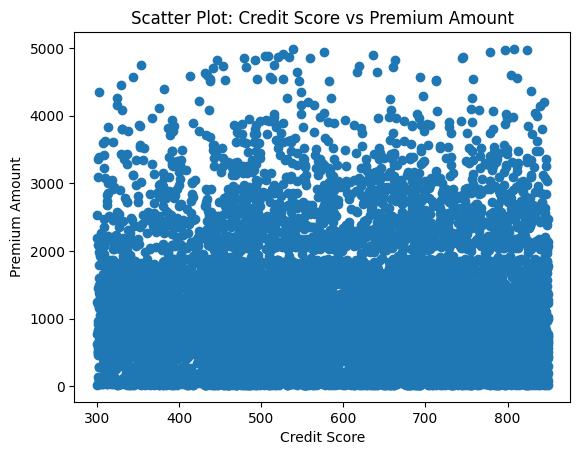

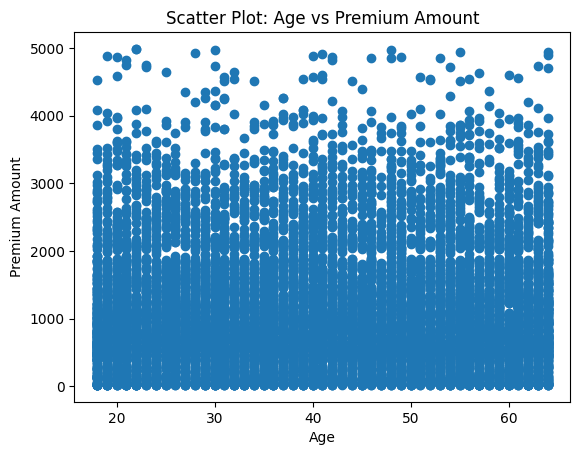

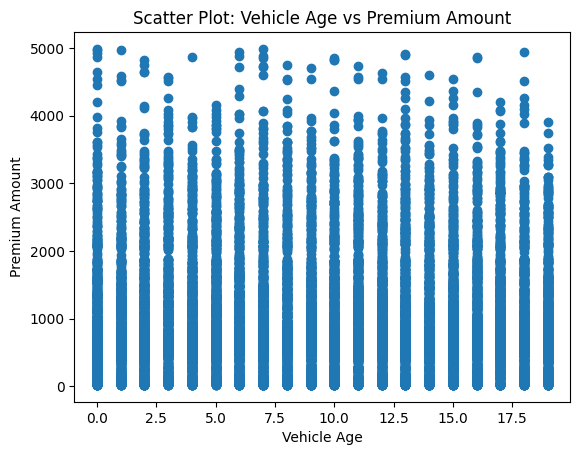

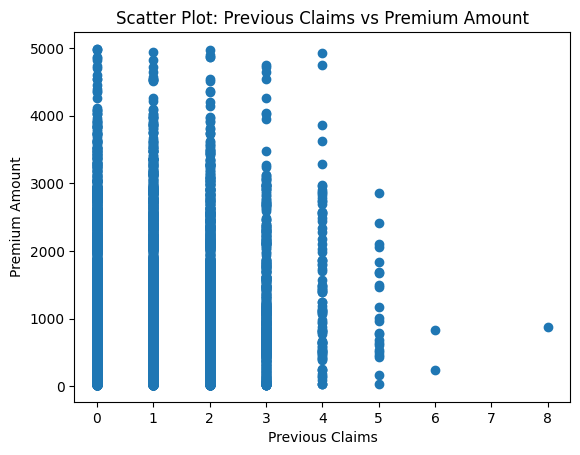

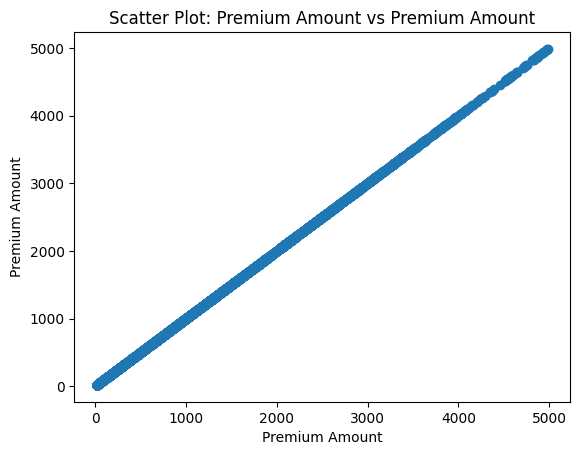

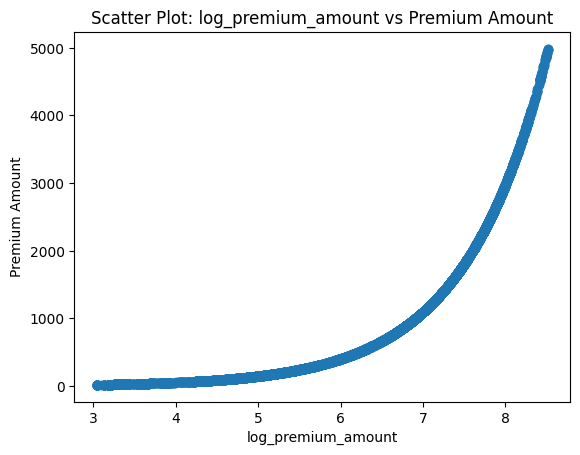

In [ ]:
sampled_data = df_features.sample(frac=0.01, random_state=42)
for column in sampled_data.columns:
    plt.scatter(sampled_data[column], sampled_data['Premium Amount'])
    plt.title(f"Scatter Plot: {column} vs Premium Amount")
    plt.xlabel(column)
    plt.ylabel("Premium Amount")
    plt.show()

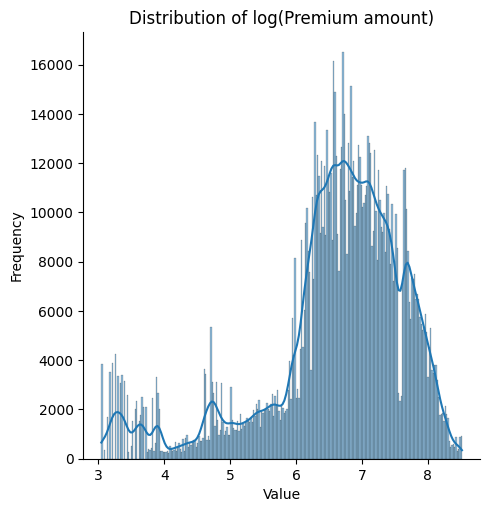

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to plot
sns.displot(df_features['log_premium_amount'], kde=True)  # kde=True adds a Kernel Density Estimate (smooth curve)

# Customize plot (optional)
plt.title('Distribution of log(Premium amount)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

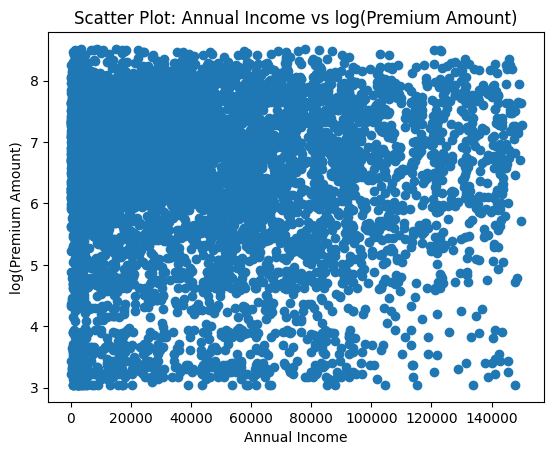

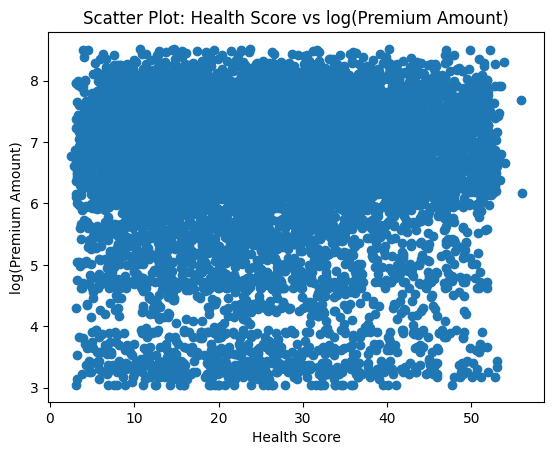

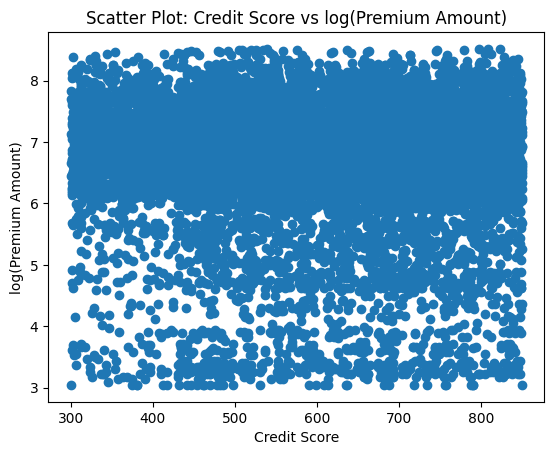

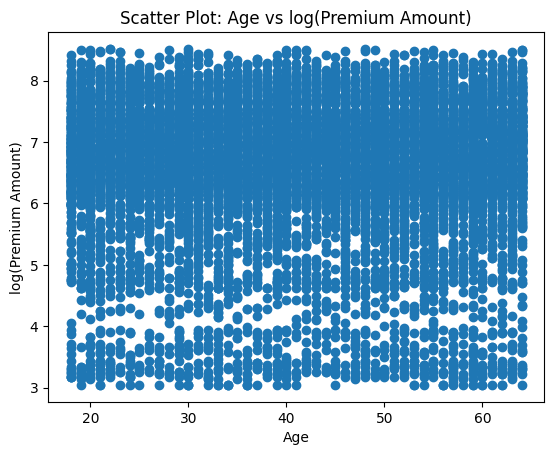

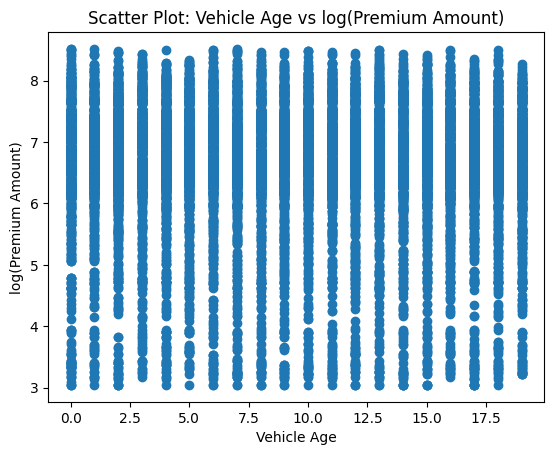

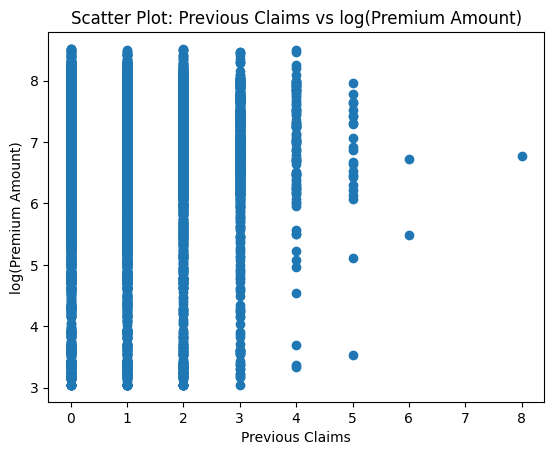

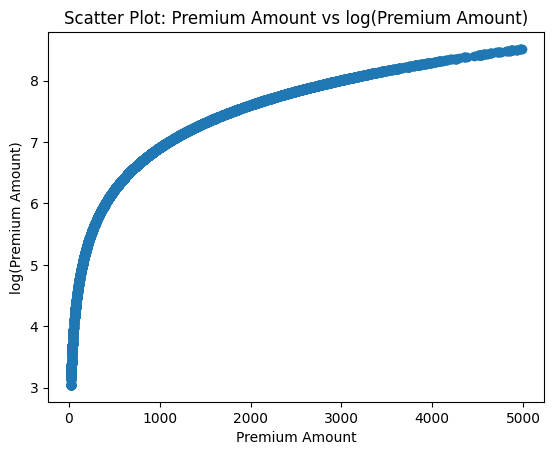

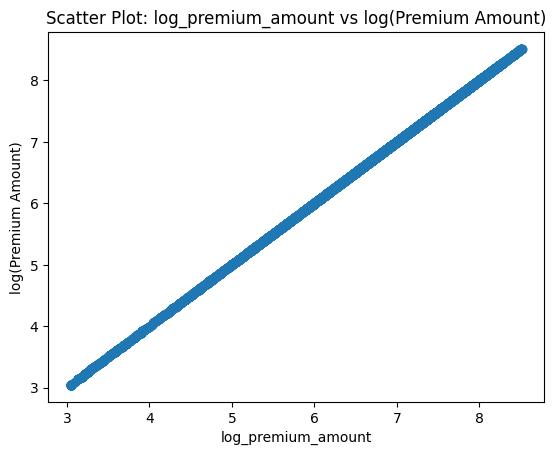

In [ ]:
# Assuming 'df_features' contains the features and 'log_premium' is the log-transformed target
sampled_data = df_features.sample(frac=0.01, random_state=42)
for column in sampled_data.columns:
    plt.scatter(sampled_data[column], sampled_data['log_premium_amount'])
    plt.title(f"Scatter Plot: {column} vs log(Premium Amount)")
    plt.xlabel(column)
    plt.ylabel("log(Premium Amount)")
    plt.show()

In [ ]:
# Calculate correlation with the log-transformed target
correlations = df_features.corrwith(df_features['Premium Amount'])
print(correlations)

Annual Income        -0.012389
Health Score          0.014704
Credit Score         -0.026014
Age                  -0.002430
Vehicle Age           0.000391
Previous Claims       0.046874
Premium Amount        1.000000
log_premium_amount    0.820760
dtype: float64


In [ ]:
# Calculate correlation with the log-transformed target
correlations = df_features.corrwith(df_features['log_premium_amount'])
print(correlations)

Annual Income        -0.087814
Health Score          0.017183
Credit Score         -0.051193
Age                  -0.002110
Vehicle Age           0.000091
Previous Claims       0.036251
Premium Amount        0.820760
log_premium_amount    1.000000
dtype: float64


In [ ]:
# Calculate correlation with the log-transformed target
correlations = df.corrwith(df['Premium Amount'])
print(correlations)

Age                    -0.002430
Gender                  0.000161
Annual Income          -0.012389
Marital Status         -0.004371
Number of Dependents   -0.000976
Education Level        -0.001121
Occupation              0.005087
Health Score            0.014704
Location                0.001059
Policy Type            -0.000884
Previous Claims         0.046874
Vehicle Age             0.000391
Credit Score           -0.026014
Insurance Duration     -0.000028
Customer Feedback      -0.012217
Smoking Status          0.000163
Exercise Frequency     -0.001098
Property Type          -0.001222
Premium Amount          1.000000
dtype: float64


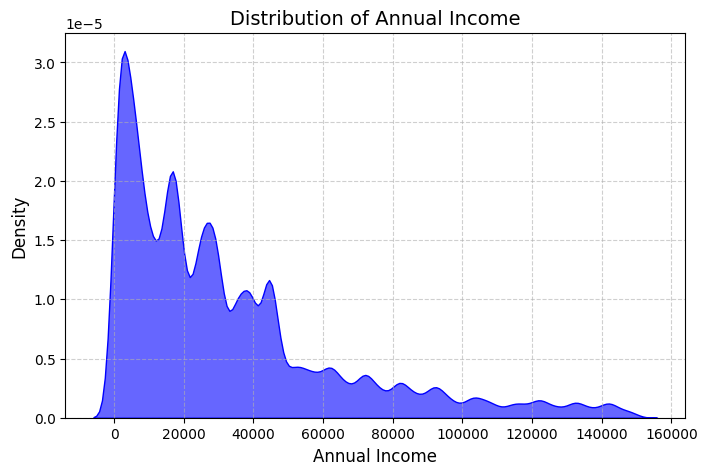

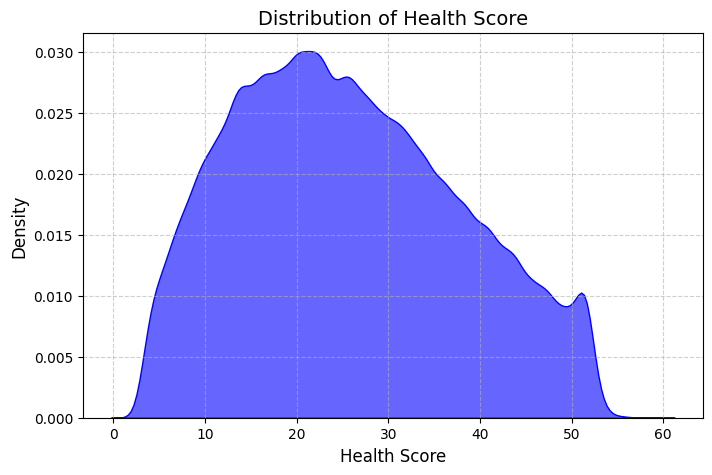

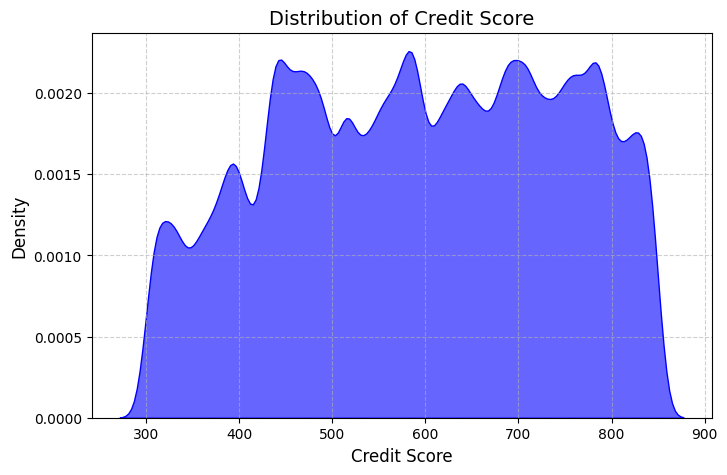

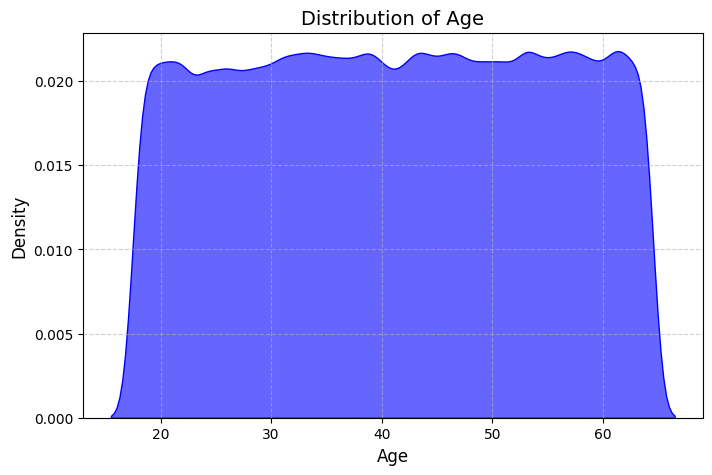

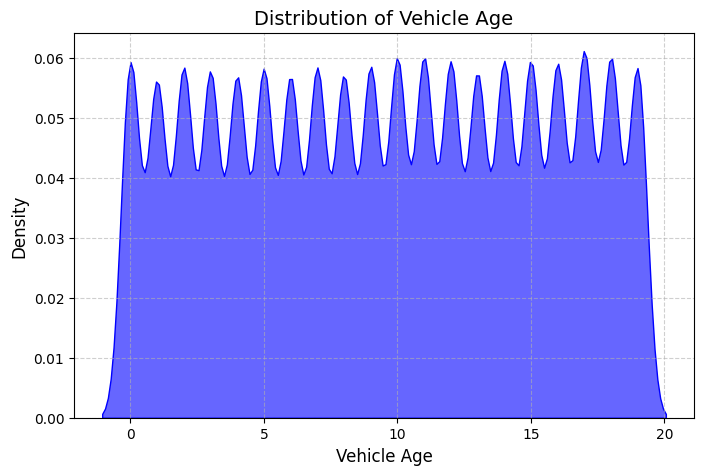

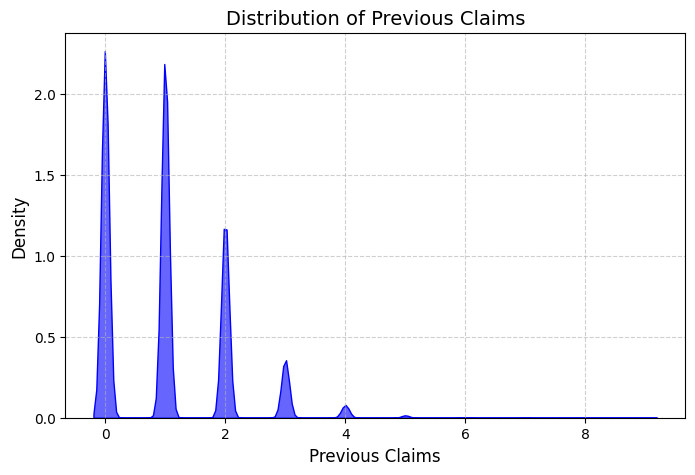

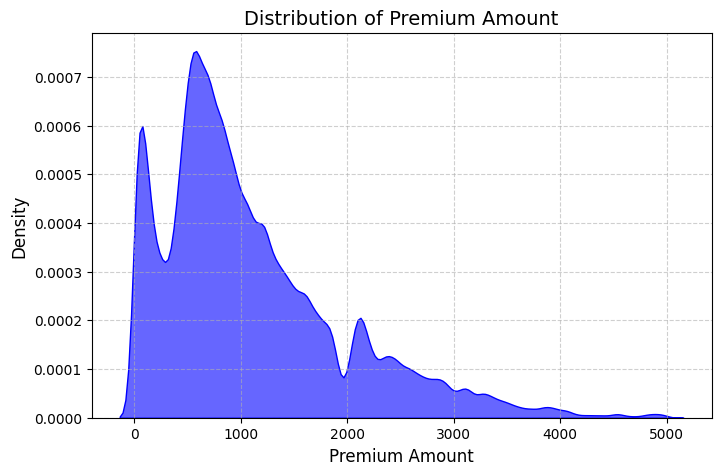

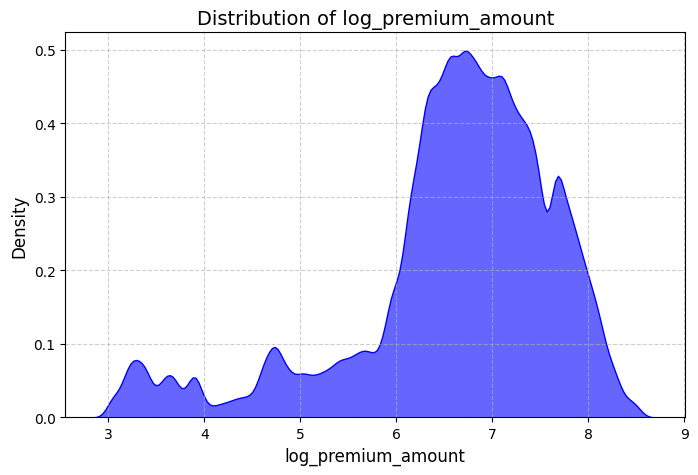

In [ ]:
for feature in df_features.columns:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_features, x=feature, fill=True, alpha=0.6, color='blue')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

https://towardsdatascience.com/a-beginners-guide-to-regression-analysis-in-machine-learning-8a828b491bbf

https://github.com/1325ankit/NYC_Taxi_Time_Prediction/blob/main/Ankit%20Soni%20NYC%20taxi%20time%20prediction%20-%20Jupyter%20Notebook.pdf

In [ ]:
df_features.drop('Premium Amount', axis=1, inplace=True)

<ipython-input-28-1267443c5127>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.drop('Premium Amount', axis=1, inplace=True)


In [ ]:
X = df_features.drop('log_premium_amount', axis=1)
y = df_features['log_premium_amount']

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df_features contains your features and df['log_premium_amount'] is the target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DMatrix for better performance with XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # For regression
    'eval_metric': 'rmse',           # Evaluation metric
    'learning_rate': 0.05,           # Step size shrinkage
    'max_depth': 6,                  # Maximum depth of trees
    'subsample': 0.8,                # Subsampling for boosting
    'colsample_bytree': 0.8,         # Feature sampling for each tree
    'random_state': 42               # Reproducibility
}

# Train the model with early stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=50, verbose_eval=10)

# Make predictions
y_pred = xgb_model.predict(dtest)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


[0]	train-rmse:1.09521	eval-rmse:1.09597
[10]	train-rmse:1.08019	eval-rmse:1.08119
[20]	train-rmse:1.06915	eval-rmse:1.07040
[30]	train-rmse:1.06470	eval-rmse:1.06615
[40]	train-rmse:1.06213	eval-rmse:1.06377
[50]	train-rmse:1.05989	eval-rmse:1.06172
[60]	train-rmse:1.05865	eval-rmse:1.06063
[70]	train-rmse:1.05751	eval-rmse:1.05966
[80]	train-rmse:1.05639	eval-rmse:1.05871
[90]	train-rmse:1.05515	eval-rmse:1.05763
[100]	train-rmse:1.05456	eval-rmse:1.05718
[110]	train-rmse:1.05417	eval-rmse:1.05695
[120]	train-rmse:1.05391	eval-rmse:1.05682
[130]	train-rmse:1.05365	eval-rmse:1.05670
[140]	train-rmse:1.05340	eval-rmse:1.05661
[150]	train-rmse:1.05314	eval-rmse:1.05651
[160]	train-rmse:1.05290	eval-rmse:1.05643
[170]	train-rmse:1.05271	eval-rmse:1.05637
[180]	train-rmse:1.05253	eval-rmse:1.05634
[190]	train-rmse:1.05234	eval-rmse:1.05630
[200]	train-rmse:1.05219	eval-rmse:1.05630
[210]	train-rmse:1.05203	eval-rmse:1.05630
[220]	train-rmse:1.05184	eval-rmse:1.05628
[230]	train-rmse:1.051

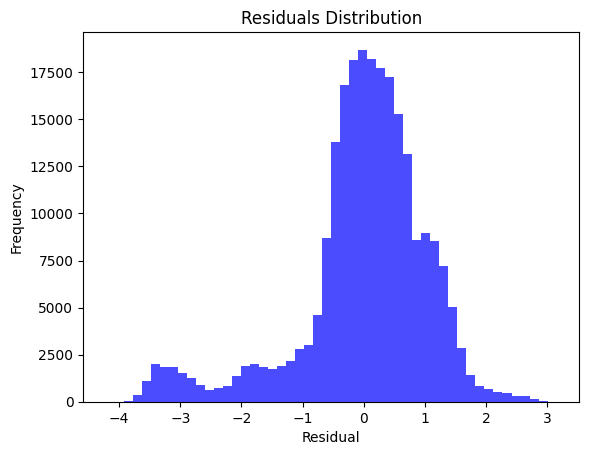

In [ ]:
residuals = y_test - y_pred
plt.hist(residuals, bins=50, color='blue', alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [ ]:
features

['Annual Income',
 'Health Score',
 'Credit Score',
 'Age',
 'Vehicle Age',
 'Previous Claims',
 'Premium Amount']

In [ ]:
test_df.set_index('id', inplace=True)

In [ ]:
test_df_matrix =xgb.DMatrix(test_df[['Annual Income','Health Score','Credit Score','Age','Vehicle Age','Previous Claims']])

In [ ]:
prediction_log = xgb_model.predict(test_df_matrix)

In [ ]:
prediction_log

array([6.5668254, 6.6849074, 6.711962 , ..., 6.7076445, 6.704978 ,
       6.6500716], dtype=float32)

In [ ]:
ids = test_df.index

In [ ]:
# If you want to create a DataFrame with predictions and corresponding IDs:
predictions_with_ids = pd.DataFrame({
    'id': ids,
    'Premium Amount': np.exp(prediction_log)  # Convert back to original scale if log-transformed
})

In [ ]:
predictions_with_ids.head()

,id,Premium Amount
0,1200000,711.108765
1,1200001,800.236633
2,1200002,822.182373
3,1200003,802.917908
4,1200004,731.613220


In [ ]:
predictions_with_ids.to_csv('submission1.csv', index=False)

https://www.kaggle.com/competitions/playground-series-s4e12/discussion/552165#3082130